# Regresión Lineal Ordinaria (LSS)

### a) Construcción del dataframe

In [244]:
#!usr/bin/env python
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np

url = 'http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/prostate.data'
df = pd.read_csv(url, sep='\t', header=0)
df = df.drop('Unnamed: 0', axis=1)
istrain_str = df['train']
istrain = np.asarray([True if s == 'T' else False for s in istrain_str])
istest = np.logical_not(istrain)
df = df.drop('train', axis=1)

La función drop devuelve un nuevo objeto con las etiquetas y ejes dados removidos.
Entonces, se remueve la columna sin nombre que denota la posición de cada registro del _dataframe_, con el siguiente código:
```python
df = df.drop('Unnamed: 0', axis=1)
```
Además la columna _train_ indica si el registro pertenece o no al conjunto de entrenamiento. Una vez almacenada en la variable *istrain_str* se elimina del conjunto de datos con la función drop, ya que no es un predictor (característica).

```python
df = df.drop('train', axis=1)
```

### b) Descripción del conjunto de datos

In [245]:
print 'El dataset se compone de %d'% df.shape[0],' registros (pacientes), cada uno de los cuáles está descrito por %d variables.\n'% df.shape[1]
df.info()
df.describe()

El dataset se compone de 97  registros (pacientes), cada uno de los cuáles está descrito por 9 variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
lcavol     97 non-null float64
lweight    97 non-null float64
age        97 non-null int64
lbph       97 non-null float64
svi        97 non-null int64
lcp        97 non-null float64
gleason    97 non-null int64
pgg45      97 non-null int64
lpsa       97 non-null float64
dtypes: float64(5), int64(4)
memory usage: 6.9 KB


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


Las variables del conjunto de datos se describen a continuación:
1. **lcavol**: Logaritmo del volumen de cáncer presente. (Predictor)
3. **lweight**: Logaritmo del peso de la próstata. (Predictor)
4. **age**: Edad. (Predictor)
5. **lbph**: Logaritmo de la cantidad de hiperplasia benigna de próstata. (Predictor)
6. **svi**: Indica si existe invasión de la vesícula seminal o no. (Predictor)
7. **lcp**: Logaritmo de la penetración capsular. (Predictor)
8. **gleason**: Medida del grado de agresividad del cáncer, en base a la escala de Gleason. (Predictor)
9. **pgg45**: Porcentaje que representa la presencia de los patrones de Gleason 4 y 5. (Predictor)
10. **lpsa**: Logaritmo del nivel de antígeno prostático específico (PSA). (Variable que se quiere predecir)

Se debe resaltar que no existen valores nulos para ningún registro.

### c) Normalización de los datos

In [246]:
from sklearn.preprocessing import StandardScaler

#Normalizacion
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

#La variable Y (lPSA) no se normaliza, sólo se normalizan las caracteristicas/predictores (features)
df_scaled['lpsa'] = df['lpsa']

# Notamos que una vez normalizado, el promedio (mean) de cada feature es practicamente 0
# y la desviacion estandar (std) es muy cercana a 1.
df_scaled.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.000000
mean,-9.614302e-17,-3.216213e-16,3.433679e-16,-4.721309e-17,-1.327689e-16,8.240831e-17,-1.476482e-16,-1.816989e-16,2.478387
std,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.154329
min,-2.300218e+00,-2.942386e+00,-3.087227e+00,-1.030029e+00,-5.256575e-01,-8.676552e-01,-1.047571e+00,-8.689573e-01,-0.430783
25%,-7.139973e-01,-5.937689e-01,-5.219612e-01,-1.030029e+00,-5.256575e-01,-8.676552e-01,-1.047571e+00,-8.689573e-01,1.731656
50%,8.264956e-02,-1.392703e-02,1.531086e-01,1.383966e-01,-5.256575e-01,-4.450983e-01,3.444069e-01,-3.343557e-01,2.591516
75%,6.626939e-01,5.806076e-01,5.581506e-01,1.010033e+00,-5.256575e-01,9.762744e-01,3.444069e-01,5.566470e-01,3.056357
max,2.107397e+00,2.701661e+00,2.043304e+00,1.542252e+00,1.902379e+00,2.216735e+00,3.128363e+00,2.695054e+00,5.582932


##### Importancia de Normalizar
Antes generar un modelo predictivo es necesario normalizar los datos, pues se está trabajando con variables medidas en unidades y escalas diferentes. Al normalizar, se eliminan los efectos de la media y la varianza de cada variable, volviéndose posible realizar comparaciones razonables entre estas. Sólo se deben normalizar las características (_features_), por tanto la variable _lpsa_ se mantiene respecto al _dataset_ original. También, se observa que la media de cada variable tiende a 0 y la varianza es muy cercana a 1. 

### d) Regresión lineal ordinaria

In [247]:
import sklearn.linear_model as lm
# Se crea el modelo de regresion lineal
X = df_scaled.ix[:,:-1] # Se obtinen las Caracteristicas (features) lcavol...pgg45
N = X.shape[0] # Cantidad de datos (97 filas/registros)
X.insert(X.shape[1], 'intercept', np.ones(N)) # Se agrega la columna Intercepto (columna de unos)
y = df_scaled['lpsa'] # La variable dependiente lPSA es almancenada en y
Xtrain = X[istrain] # Se crea el conjunto de entrenamiento para las caracteristicas
ytrain = y[istrain] # Se crea el conjunto de entramiento para la variable a predecir
Xtest = X[np.logical_not(istrain)] # Se crea el conjunto de prueba para las caracteristicas PSA
ytest = y[np.logical_not(istrain)] # Se crea el conjunto de prueba para la variable a predecir PSA
linreg = lm.LinearRegression(fit_intercept = False) #Generación del modelo
linreg.fit(Xtrain, ytrain) # Se ajusta (fit) el modelo de acuerdo a los datos de entrenamiento

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

### e) Pesos y Z-score

In [248]:
# Se obtiene el peso asociado a cada variable y su error estandar
weights = linreg.coef_
SEM = np.asarray(Xtrain.std()) / np.sqrt(len(Xtrain))
# A partir de lo anterior, se calculan los Z-score de cada variable
Z_score = weights / SEM

In [249]:
from sklearn import cross_validation
#(f)
#Se estima error de prediccion del modelo utilizando k-fold k = 5 y k = 10
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
print 'mse_test = %.4f'% mse_test
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

print 'Cross validation'
for i in range(5,11,5):
    k_fold = cross_validation.KFold(len(Xm),i)
    mse_cv = 0
    for k, (train, val) in enumerate(k_fold):
      linreg = lm.LinearRegression(fit_intercept = False)
      linreg.fit(Xm[train], ym[train])
      yhat_val = linreg.predict(Xm[val])
      mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
      mse_cv += mse_fold
    mse_cv = mse_cv/i
    print 'k = %d'% i, ' mse = %.4f'% mse_cv


mse_test = 0.5213
Cross validation
k = 5  mse = 0.9565
k = 10  mse = 0.7572


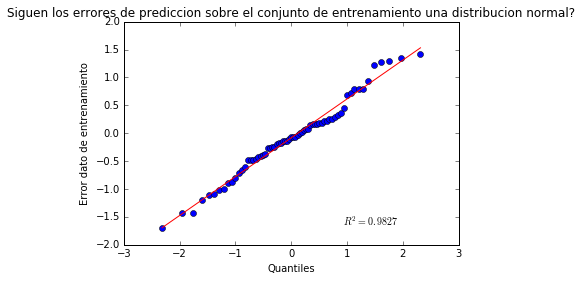

In [250]:
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

#Se estima error de prediccion por cada dato de entrenamiento
yhat_train = linreg.predict(Xtrain)
ytrain_array = np.asarray(ytrain)
error = yhat_train - ytrain_array

#Se genera grafico de errores

stats.probplot(error, dist='norm', plot=plt)
plt.title('Siguen los errores de prediccion sobre el conjunto de entrenamiento una distribucion normal?')
plt.ylabel('Error dato de entrenamiento')
plt.show()

# Selección de Atributos

### a) Forward stepwise selection

En primer lugar se restablecen las matrices

In [264]:
X = df_scaled.ix[:,:-1] # Se obtinen las Caracteristicas (features) lcavol...pgg45
N = X.shape[0] # Cantidad de datos (97 filas/registros)
X.insert(X.shape[1], 'intercept', np.ones(N)) # Se agrega la columna Intercepto (columna de unos)
y = df_scaled['lpsa'] # La variable dependiente lPSA es almancenada en y
Xtrain = X[istrain] # Se crea el conjunto de entrenamiento para las caracteristicas
ytrain = y[istrain] # Se crea el conjunto de entramiento para la variable a predecir
Xtest = X[np.logical_not(istrain)] # Se crea el conjunto de prueba para las caracteristicas PSA
ytest = y[np.logical_not(istrain)] 
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
Xt = Xtest.as_matrix()
yt = ytest.as_matrix()

El criterio a utilizar para la incluir o remover predictores del modelo es K-fold cross validation, esto permitirá evaluar localmente cada variable, y reducir en cierta forma el overfitting que produce solo utilizar MSE. Con esto es posible que el modelo generalice en mayor medida ya que se puede obtener una mejor estimación del error de generalización en cada paso.
Se define la siguiente función que obtiene el MSE de un k-fold cross validation con $k=10$

In [252]:
def MSE_Kfold(Xm, ym):
	k_fold = cross_validation.KFold(len(Xm),10)
	mse_cv = 0
	for k, (train, val) in enumerate(k_fold):
		linreg = lm.LinearRegression(fit_intercept = False)
		linreg.fit(Xm[train], ym[train])
		yhat_val = linreg.predict(Xm[val])
		mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
		mse_cv += mse_fold
	mse_cv = mse_cv / 10
	return mse_cv


A continuación se define la función que realiza Forward-StepWise selection. Notar que también se mantiene el mse "común" para comparar posteriormente.

In [253]:
def fss(x, y, names_x, k = 10000, criterio = "mse"):
    #p es el numero de variables(sin intercepto)
	p = x.shape[1]-1
	k = min(p, k)
	names_x = np.array(names_x)
    #variables restantes
	remaining = range(0, p)
    #se comienza con el intercepto como base
	selected = [p]
	current_score = 0.0
	best_new_score = 0.0
	while remaining and len(selected)<=k :
		score_candidates = []
		for candidate in remaining:
            #Se crea el modelo de regresion y se evalua en las variables
			model = lm.LinearRegression(fit_intercept=False)
			indexes = selected + [candidate]
			x_train = x[:,indexes]
			predictions_train = model.fit(x_train, y).predict(x_train)
			residuals_train = predictions_train - y
            #Se evaluan los dos indices para incorporar variables
			mse_candidate = np.mean(np.power(residuals_train, 2))
			mse_cv_candidate = MSE_Kfold(x_train,y)
			if criterio == "mse":
				score_candidates.append((mse_candidate, candidate))
			elif criterio == "cv":
				score_candidates.append((mse_cv_candidate, candidate))
		score_candidates.sort()
		score_candidates[:] = score_candidates[::-1]
        #Se agrega el mejor candidato.
		best_new_score, best_candidate = score_candidates.pop()
		remaining.remove(best_candidate)
		selected.append(best_candidate)
		#print "selected = %s ..."%names_x[best_candidate]
		#print "totalvars=%d, mse = %f"%(len(indexes)-1,best_new_score)
	return selected

Además se utilizan las siguientes funciones auxiliares para obtener el error cuadrático medio para cada numero de variables y graficar tanto training como testing set. Notar que como las funciones bss y fss retornan vectores particulares, el analisis para ambos es distinto.  

In [254]:
def CalcularMse(vector_selected, xm,ym,xt,yt,mode):
    #Si es modo bss el vector de entrada es el orden de eliminacion
	if mode=="bss":
			indexes = vector_selected[:]
    #En cambio si es fss es el orden en que se agregan las variables.
	else:
		indexes = [xm.shape[1]-1]
	variables = range(1, len(vector_selected))
	mse_training = []
	mse_testing = []
	for i in range(1, len(vector_selected)):
		if mode=="bss":
            #En este caso indexes es un arreglo de todas las variables, y se borra 
            # la primera segun el orden de eliminacion para evaluar el mse.
			indexes = [x for j,x in enumerate(indexes) if j!=1]
		else:
            #En este caso solo se agrega la siguiente variable en elvector de seleccion fss.
			indexes = indexes + [vector_selected[i]]
		x_train = xm[:,indexes]
		x_test = xt[:,indexes]
        # Se calcula el MSE para ese conjunto particular de variables.
		model = lm.LinearRegression(fit_intercept=False)
		predictions_train = model.fit(x_train, ym).predict(x_train)
		predictions_test = model.predict(x_test)
		residuals_train = predictions_train - ym
		residuals_test = predictions_test - yt
		mse_training.append(np.mean(np.power(residuals_train, 2)))
		mse_testing.append(np.mean(np.power(residuals_test, 2)))
    #retorna los errores respectivos en una tupla de 2 listas.
	return (mse_training,mse_testing,variables)

def PlotMSE(data, criterio, mode="fss"):
	axes = plt.gca()
	if mode=="fss":
		plt.plot(data[2], data[0] , color='blue', linewidth=3, label = "training set")
		plt.plot(data[2], data[1] , color='red', linewidth=3, label = "testing set")
		axes.set_ylim([0.3,0.8])
	elif mode =="bss":
		plt.gca().invert_xaxis()
		plt.plot(data[2][::-1], data[0] , color='blue', linewidth=3, label = "training set")
		plt.plot(data[2][::-1], data[1] , color='red', linewidth=3, label = "testing set")
		axes.set_ylim([0.3,1.5])

	plt.title('Error versus numero de variables ' + mode + ' - ' + criterio)	
	plt.legend()
	plt.xlabel('Numero de variables')
	plt.ylabel('Error MSE')
	plt.show()

##### A continuación se muestran los gráficos obtenidos:

Orden seleccion mse:  [0, 1, 4, 3, 7, 5, 2, 6]
Orden seleccion cv:  [0, 1, 3, 4, 7, 5, 2, 6]


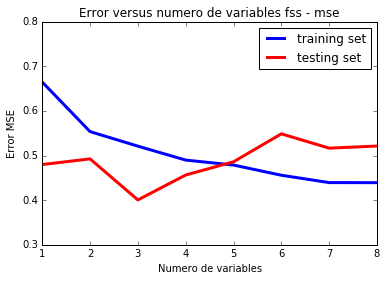

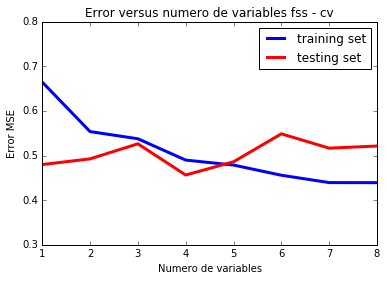

In [265]:
names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
fss_result_mse = fss(Xm,ym,names_regressors, criterio = "mse")
fss_result_cv = fss(Xm,ym,names_regressors, criterio = "cv")
print "Orden seleccion mse: ", fss_result_mse[1:]
print "Orden seleccion cv: ", fss_result_cv[1:]
PlotMSE(CalcularMse(fss_result_mse,Xm,ym,Xt,yt,"fss"),"mse", mode="fss")
PlotMSE(CalcularMse(fss_result_cv,Xm,ym,Xt,yt,"fss"),"cv", mode="fss")

Como se aprecia, k-fold y mse son muy similares en cuanto a su gráfica. A priori el grafico MSE parece indicar que con 3 variables el error es mínimo, pero analizando el grafico CV,  se puede notar que se pega a la curva de training set, lo que indica posiblemente que lo que ocurre en MSE es un caso particular para estos datos. Entonces una mejor forma es elegir el punto de intersección de las curvas o un valor cercano a este, en este caso puede ser 4 o 5 variables. 
Esto permite una mejor generalización y disminuir la complejidad del problema, ya que como se nota, al incluir mas de 5 variables el error aumenta significativamente, provocando sobre ajuste por demasiada información.

### b) Backward Stepwise selection

Este caso es muy similar al anterior, solo se realizan ciertas modificaciones en la función pero los criterios se mantienen

In [256]:
def bss(x, y, names_x, k = 10000, criterio = "mse"):
    #p es el numero de variables(sin intercepto)
	p = x.shape[1]-1
	k = min(p, k)
	names_x = np.array(names_x)
    #variables restantes
	remaining = range(0,p)
    #Selected en este caso contiene todas las variables incluido el intercepto
	selected = range(0, p+1)
    #Variable que agrega secuencialmente las variables eliminadas, comienza con el intercepto
	order_del = [p]
	current_score = 0.0
	best_new_score = 0.0
    #la condicion ahora es mientras queden almenos 2 variables
	while remaining and len(selected)>=2 :
		score_candidates = []
		for candidate in remaining:
            # Copia para evaluar subconjuntos de variables
			sel_copy = selected[:]
			model = lm.LinearRegression(fit_intercept=False)
            #Se remueve el candidato a borrar
			sel_copy.remove(candidate)
			indexes = sel_copy
            #Modelo de prediccion con el conjunto de variables sin el candidato
			x_train = x[:,indexes]
			predictions_train = model.fit(x_train, y).predict(x_train)
			residuals_train = predictions_train - y
			mse_candidate = np.mean(np.power(residuals_train, 2))
			mse_cv_candidate = MSE_Kfold(x_train,y)
			if criterio == "mse":
				score_candidates.append((mse_candidate, candidate))
			elif criterio == "cv":
				score_candidates.append((mse_cv_candidate, candidate))
		score_candidates.sort()
		score_candidates[:] = score_candidates[::-1]
        #En este caso el ultimo elemento representa el menor error de las variables restantes 
        #sin el candidato y por ende el candidato a borrar
		worst_new_score, worst_candidate = score_candidates.pop()
        #Lo que se retorna es el orden de eliminacion
		order_del.append(worst_candidate)
        #se quita la peor variablede la lista
		remaining.remove(worst_candidate)
		selected.remove(worst_candidate)
		#print "selected = %s ..."%names_x[best_candidate]
		#print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
	return (order_del,selected)

##### Gráficos y orden de eliminación de los predictores

Orden eliminacion mse:  [6, 2, 5, 7, 3, 4, 1, 0]
Orden eliminacion cv:  [6, 2, 5, 7, 4, 3, 1, 0]


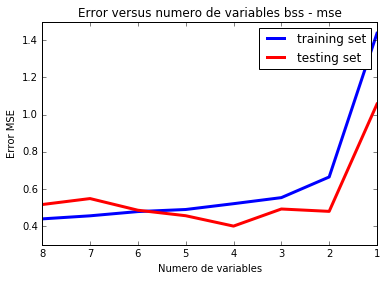

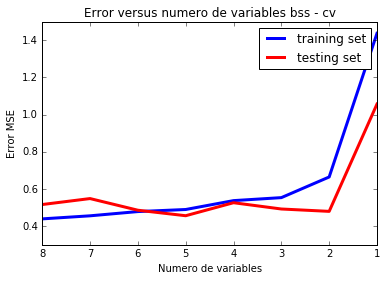

In [257]:
bss_result_mse = bss(Xm,ym,names_regressors, criterio ="mse")
bss_result_cv = bss(Xm,ym,names_regressors, criterio ="cv")
print "Orden eliminacion mse: ", bss_result_mse[0][1:]
print "Orden eliminacion cv: ", bss_result_cv[0][1:]
PlotMSE(CalcularMse(bss_result_mse[0],Xm,ym,Xt,yt,"bss"), "mse",mode="bss")
PlotMSE(CalcularMse(bss_result_cv[0],Xm,ym,Xt,yt,"bss"), "cv",mode="bss")

En el caso de bss, se puede apreciar que tanto para MSE como para Cross Validation el orden de eliminación es el mismo que el orden de selección en fss. Sin embargo los errores difieren, es asi como BSS al tener la panoramica completa de la situación produce que la curva de testing set se adapte mucho mejor a la de training, con un costo mayor ya que debe manipular muchas variables desde el comienzo. FSS por su parte es mucho más rápido en ese sentido pero solo mira localmente en cada paso, produciendo que posteriormente el testing set no se adecue muy bien a la selección de features. 
Nuevamente 4 o 5 variables entregan un resultado que se adecua muy bien, y también notar que cross validation aproxima mejor el comportamiento predictivo de la situación.

# Pregunta 3: Regularización

(a) En este caso se utiliza un regresion lineal con regularizacion usando ridge regression. $$\hat \beta{}^\mathrm{ridge} = \underset{\beta}{\mathrm{argmin}}\left\{\sum_{i=1}^N(y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j)^2 + \lambda \sum_{j=1}^p \beta_j^2\right\}$$Se debe notar que se quita el intercepto, es decir, $\beta_{0}$, ya que la funcion Ridge trabaja con los features concretos del dataset y el intercepto es estimado como: $$ \beta_{0} = \overline{y} = \frac{1}{N} \sum_{i=1}^{N} y_{i}$$ Si el intercepto no es quitado del termino de penalizacion, puede provocar desplazamientos que eventualmente alterarian el origen del vector $Y$, por lo cual un desplazamiento "c" en los target $y_{i}$ no necesariamente provocaria un desplazamiento "c" en los valores predecidos $\hat y_{i}$

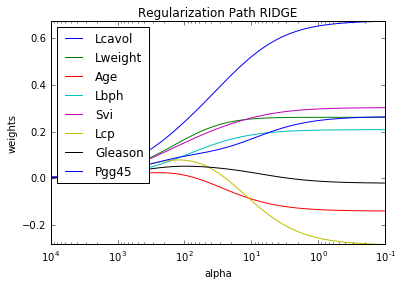

In [258]:
from sklearn.linear_model import Ridge
X = X.drop('intercept', axis=1)
Xtrain = X[istrain]
ytrain = y[istrain]
names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
alphas_ = np.logspace(4,-1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
	model.set_params(alpha=a)
	model.fit(Xtrain, ytrain)
	coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
	#print alphas_.shape
	#print y_arr.shape
	plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

#### (b)
Lasso

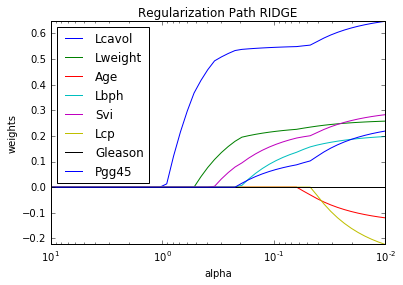

In [259]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(1,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
	model.set_params(alpha=a)
	model.fit(Xtrain, ytrain)
	coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
	#print alphas_.shape
	#print y_arr.shape
	plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

### (c)
pregunta c

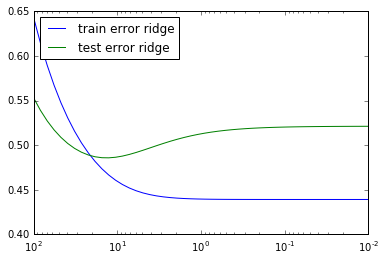

In [260]:
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Ridge(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
	model.set_params(alpha=a)
	model.fit(Xtrain, ytrain)
	yhat_train = model.predict(Xtrain)
	yhat_test = model.predict(Xtest)
	mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
	mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

### (d)

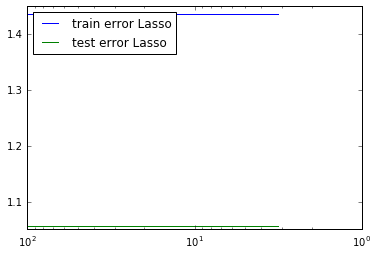

In [261]:
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(0.5,2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
	model.set_params(alpha=a)
	model.fit(Xtrain, ytrain)
	yhat_train = model.predict(Xtrain)
	yhat_test = model.predict(Xtest)
	mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
	mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error Lasso')
ax.plot(alphas_,mse_test,label='test error Lasso')
plt.legend(loc=2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

### (e)

In [262]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
k_fold = cross_validation.KFold(len(Xm),10)
best_cv_mse = float("inf")
model = Lasso(fit_intercept=True)
for a in alphas_:
	model.set_params(alpha=a)
	mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) for train, val in k_fold]
	if np.mean(mse_list_k10) < best_cv_mse:
		best_cv_mse = np.mean(mse_list_k10)
		best_alpha = a
		print "BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

BEST PARAMETER=3.162278, MSE(CV)=1.795596
